# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 2. Read the dataset

In [2]:
df = pd.read_csv('tweets.csv')
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   author  400 non-null    object
 2   status  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


# 3. Split the dataset into X and y

In [4]:
X = df['status']
y = df['author']

# 4. Split the dataset into training set and testing set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
cv = CountVectorizer()
cv_train = cv.fit_transform(X_train)
cv_test = cv.transform(X_test)

In [8]:
tf_idf = TfidfVectorizer()
tf_train = tf_idf.fit_transform(X_train) 
tf_test = tf_idf.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [9]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr2 = LogisticRegression()

#### Tfidf Vectorizer

In [10]:
lr_tf = lr1.fit(tf_train,y_train)

####  Count Vectorizer

In [11]:
lr_cf = lr2.fit(cv_train,y_train)

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [12]:
from sklearn import svm
svm1 = svm.SVC()
svm2 = svm.SVC()

#### Tfidf Vectorizer

In [13]:
lr_tf1 = svm1.fit(tf_train, y_train)

####  Count Vectorizer

In [14]:
lr_cf1 = svm2.fit(cv_train, y_train)

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [15]:
# LR Tfidf
tf_pred = lr_tf.predict(tf_test)
print(classification_report(y_test,tf_pred))
print(confusion_matrix(y_test,tf_pred))

                 precision    recall  f1-score   support

Donald J. Trump       0.92      0.86      0.89        64
 Justin Trudeau       0.85      0.91      0.88        56

       accuracy                           0.88       120
      macro avg       0.88      0.89      0.88       120
   weighted avg       0.89      0.88      0.88       120

[[55  9]
 [ 5 51]]


In [16]:
# LR cv
cv_pred = lr_cf.predict(cv_test)
print(classification_report(y_test,cv_pred))
print(confusion_matrix(y_test,cv_pred))

                 precision    recall  f1-score   support

Donald J. Trump       0.98      0.83      0.90        64
 Justin Trudeau       0.83      0.98      0.90        56

       accuracy                           0.90       120
      macro avg       0.91      0.91      0.90       120
   weighted avg       0.91      0.90      0.90       120

[[53 11]
 [ 1 55]]


In [17]:
# SVM Tfidf
tf_pred1 = lr_tf1.predict(tf_test)
print(classification_report(y_test,tf_pred1))
print(confusion_matrix(y_test,tf_pred1))

                 precision    recall  f1-score   support

Donald J. Trump       0.95      0.88      0.91        64
 Justin Trudeau       0.87      0.95      0.91        56

       accuracy                           0.91       120
      macro avg       0.91      0.91      0.91       120
   weighted avg       0.91      0.91      0.91       120

[[56  8]
 [ 3 53]]


In [18]:
# SVM cv
cv_pred1 = lr_cf1.predict(cv_test)
print(classification_report(y_test,cv_pred1))
print(confusion_matrix(y_test,cv_pred1))

                 precision    recall  f1-score   support

Donald J. Trump       0.95      0.89      0.92        64
 Justin Trudeau       0.88      0.95      0.91        56

       accuracy                           0.92       120
      macro avg       0.92      0.92      0.92       120
   weighted avg       0.92      0.92      0.92       120

[[57  7]
 [ 3 53]]


# 9. Plot a confusion matrix for both Logistic Regression and SVM

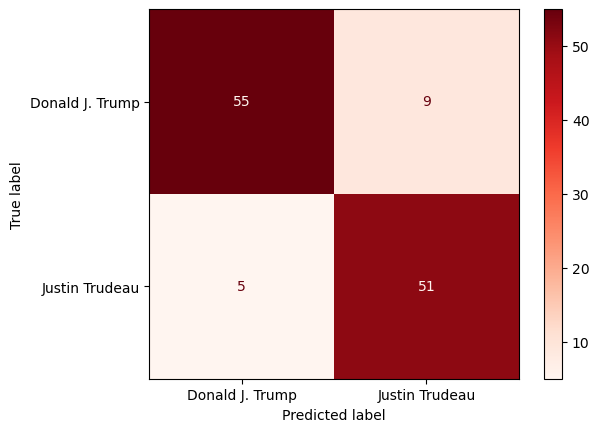

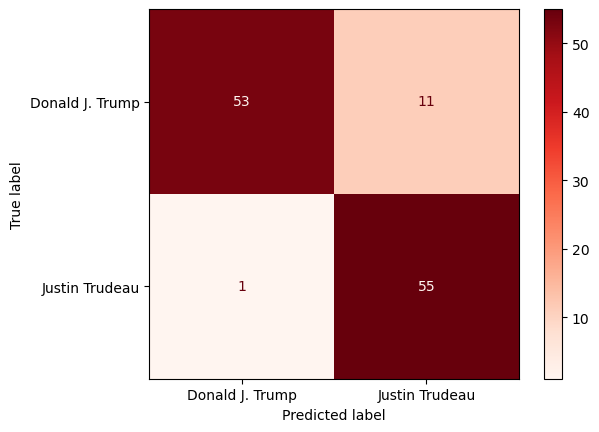

In [19]:
plot_confusion_matrix(lr_tf, tf_test, y_test, cmap='Reds')
plot_confusion_matrix(lr_cf, cv_test, y_test, cmap='Reds');

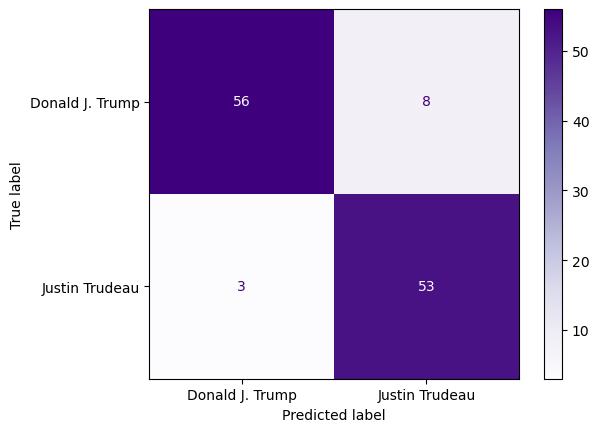

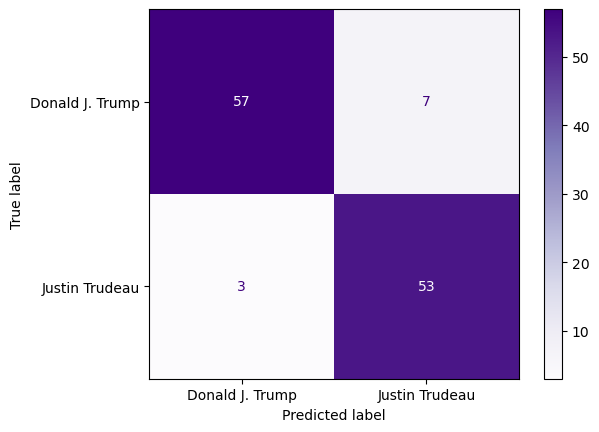

In [20]:
plot_confusion_matrix(lr_tf1, tf_test, y_test, cmap='Purples')
plot_confusion_matrix(lr_cf1, cv_test, y_test, cmap='Purples');